# **Evaluación Proyecto Final - Python for Data Analysis**

### INTEGRANTES:
- Apagüeño Fashé, Vera Lucia
- Eustaquio Jiménez, Roberto Edmundo
- Martell Morayra, Yago Derek
- Ugarte Salas, Rafael

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model  # Importar modelo de regresión lineal
from sklearn.tree import DecisionTreeRegressor  # Importar modelo de Árbol de Decisión
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Definimos la ruta del archivo en Google Drive
ruta = "./Data/dataset.txt"

# Cargamos el archivo en un DataFrame
df = pd.read_csv(ruta)

# Mostramos el dataset
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38
150146,212639,9984,235.8375,235.8375,30
150147,212642,9984,357.6750,483.7875,31
150148,212643,9984,141.7875,191.6625,12


# 1. Exploración Inicial de los Datos

In [ ]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [ ]:
# Estadísticas descriptivas del dataset
df.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,206.626751,219.425927,51.674206
std,61386.037861,615.591445,103.308516,110.961712,60.207904
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


In [ ]:
# Verificamos si hay valores nulos
df.isnull().sum()

,0
ID,0
Store ID,0
Total Price,1
Base Price,0
Units Sold,0


# 2. Limpieza de datos

In [ ]:
# Eliminar valores nulos en la columna "Total Price"
df = df.dropna(subset=["Total Price"])

# Verificamos si hay valores nulos
df.isnull().sum()

,0
ID,0
Store ID,0
Total Price,0
Base Price,0
Units Sold,0


# 3. Visualización de datos

In [ ]:
# En primer lugar, haremos agrupacion necesaria para obtener las ventas por tienda, unidades vendidas y precio promedio por tienda
ventas_por_tienda = df.groupby("Store ID")["Total Price"].sum().sort_values(ascending=False)
unidades_por_tienda = df.groupby("Store ID")["Units Sold"].sum().sort_values(ascending=False)
precio_promedio = df.groupby("Store ID")["Total Price"].mean().sort_values(ascending=False)

Total de ventas por tienda

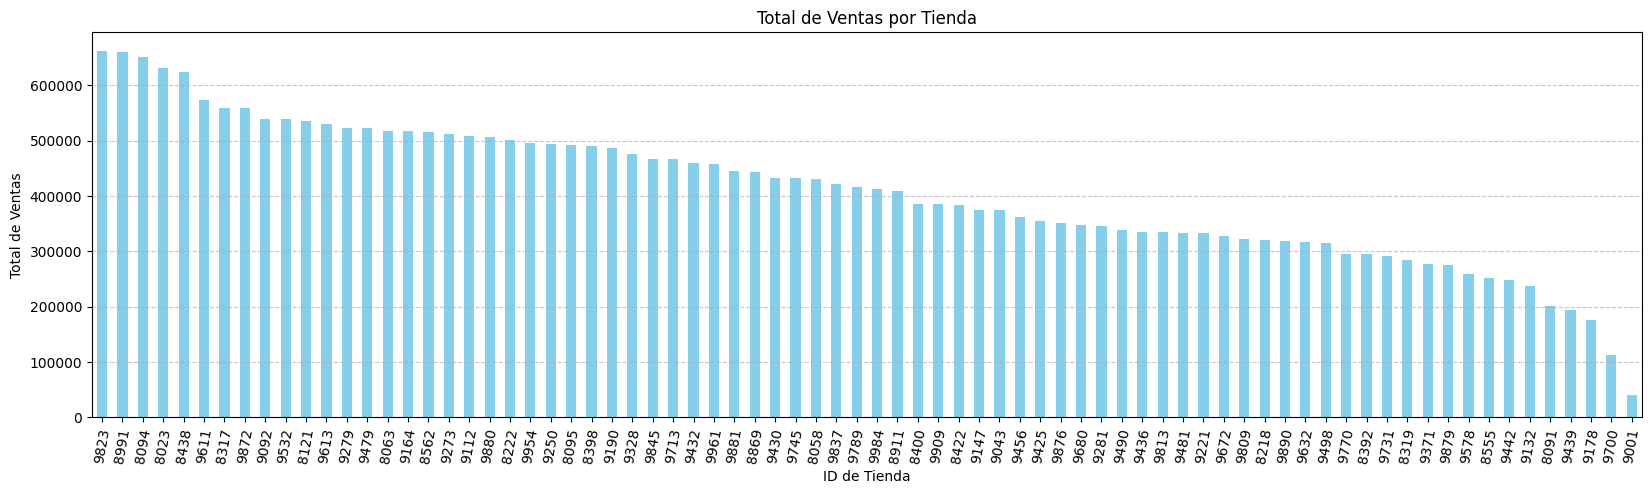

In [ ]:
plt.figure(figsize=(20, 5))
ventas_por_tienda.plot(kind="bar", color="skyblue")

# Graficar
plt.title("Total de Ventas por Tienda")
plt.xlabel("ID de Tienda")
plt.ylabel("Total de Ventas")
plt.xticks(rotation=80)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Total de unidades vendidas por tienda

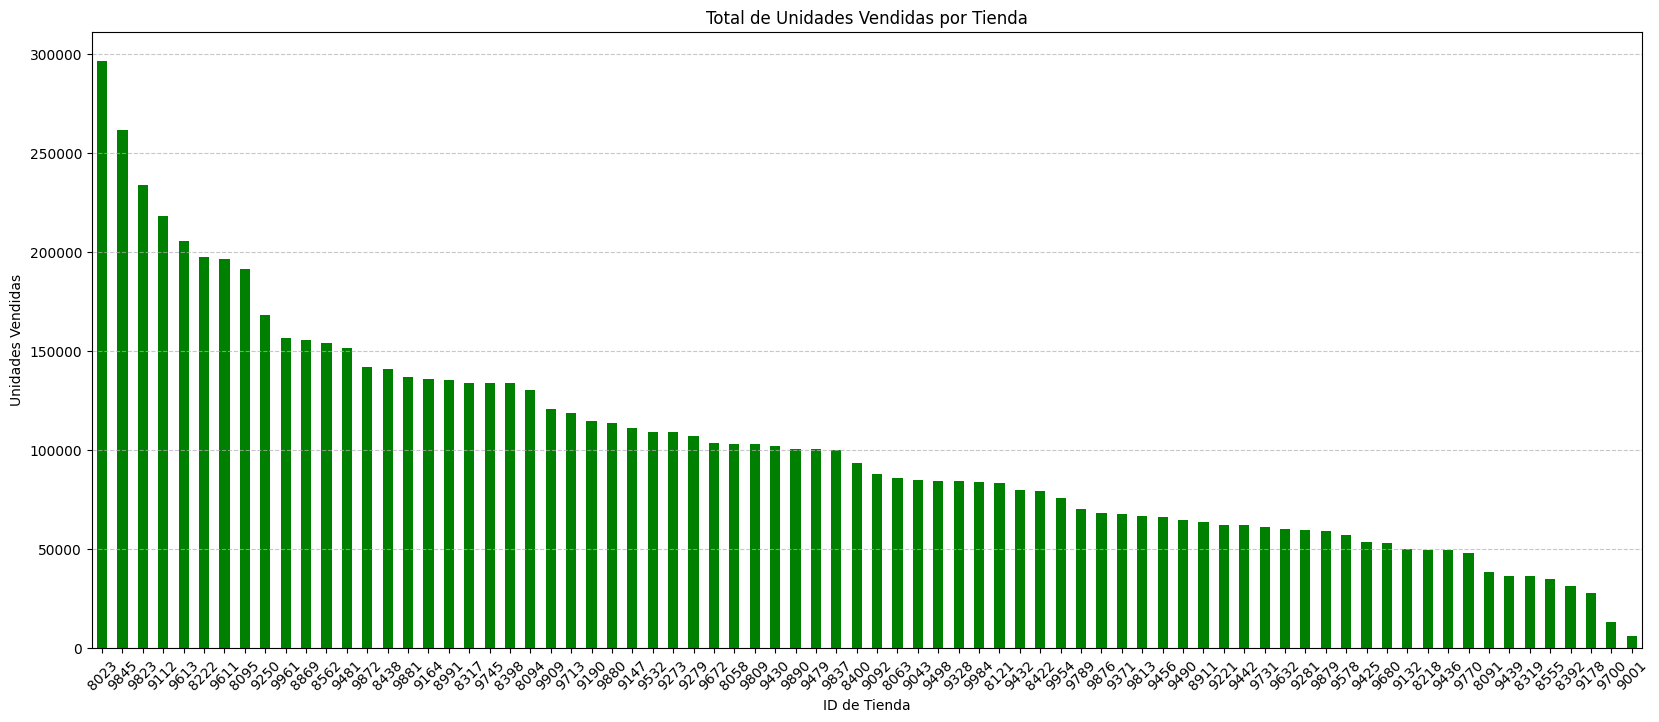

In [ ]:
plt.figure(figsize=(20, 8))
unidades_por_tienda.plot(kind="bar", color="green")

# Graficar
plt.title("Total de Unidades Vendidas por Tienda")
plt.xlabel("ID de Tienda")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Precio promedio por tienda

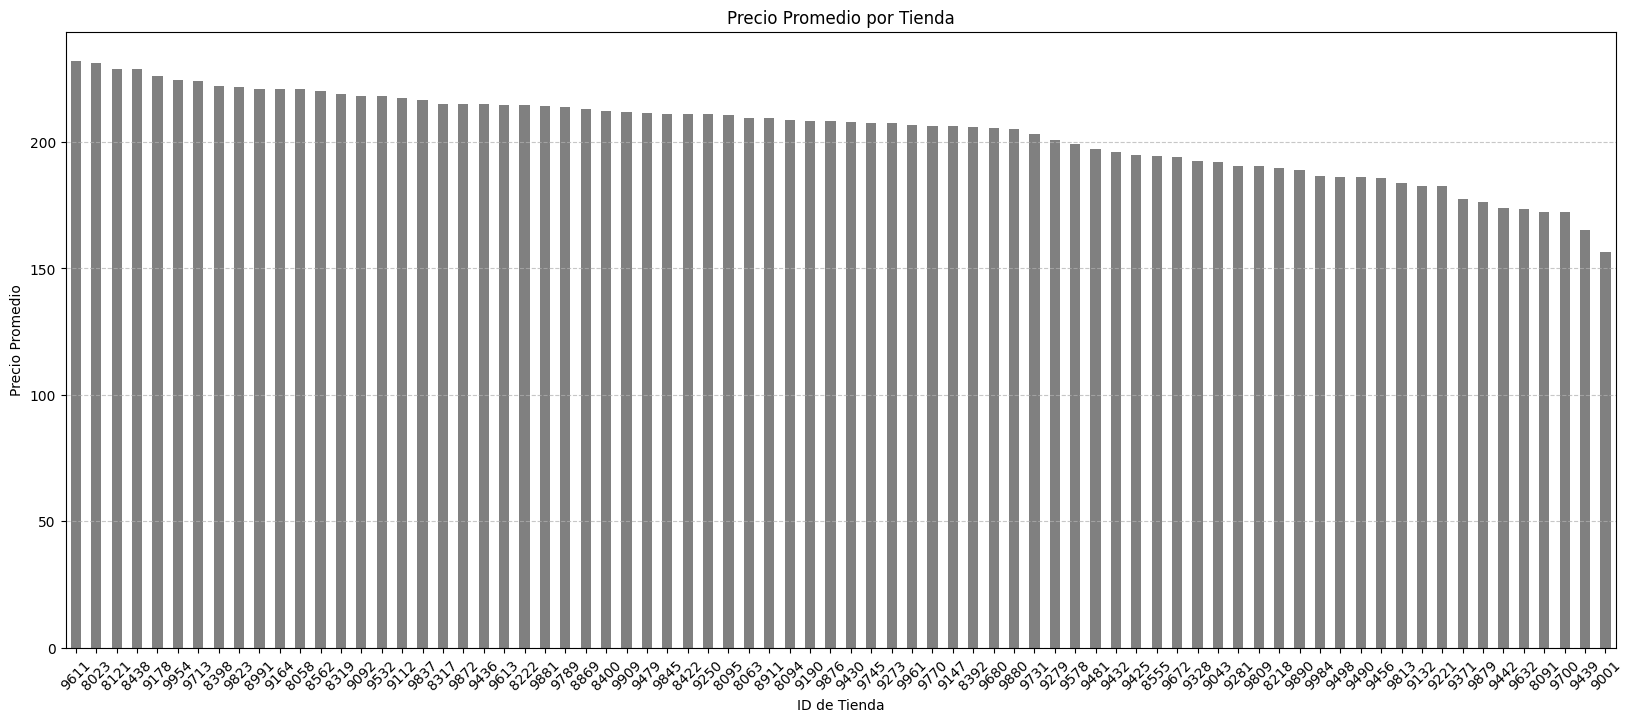

In [ ]:
plt.figure(figsize=(20, 8))
precio_promedio.plot(kind="bar", color="grey")

# Graficar
plt.title("Precio Promedio por Tienda")
plt.xlabel("ID de Tienda")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Top 10 tiendas con más ventas

<ipython-input-142-8b62d0063cb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Revenue"] = df["Total Price"] * df["Units Sold"]


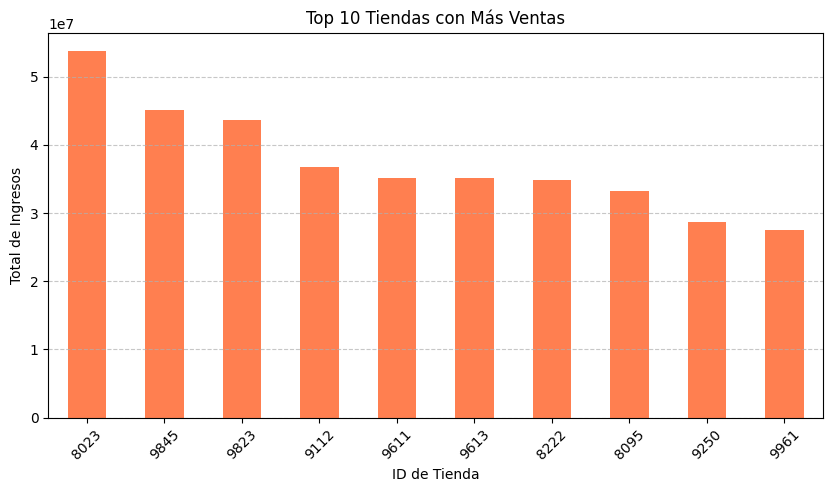

In [ ]:
# Calcular los ingresos totales
df["Total Revenue"] = df["Total Price"] * df["Units Sold"]

# Agrupar los ingresos por tienda
ventas_por_tienda = df.groupby("Store ID")["Total Revenue"].sum().sort_values(ascending=False)

# Filtrar las 10 tiendas con más ingresos
top_n = 10
ventas_top = ventas_por_tienda.head(top_n)

# Graficar
plt.figure(figsize=(10, 5))
ventas_top.plot(kind="bar", color="coral")
plt.title(f"Top {top_n} Tiendas con Más Ventas")
plt.xlabel("ID de Tienda")
plt.ylabel("Total de Ingresos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Top 10 tiendas con más unidades vendidas

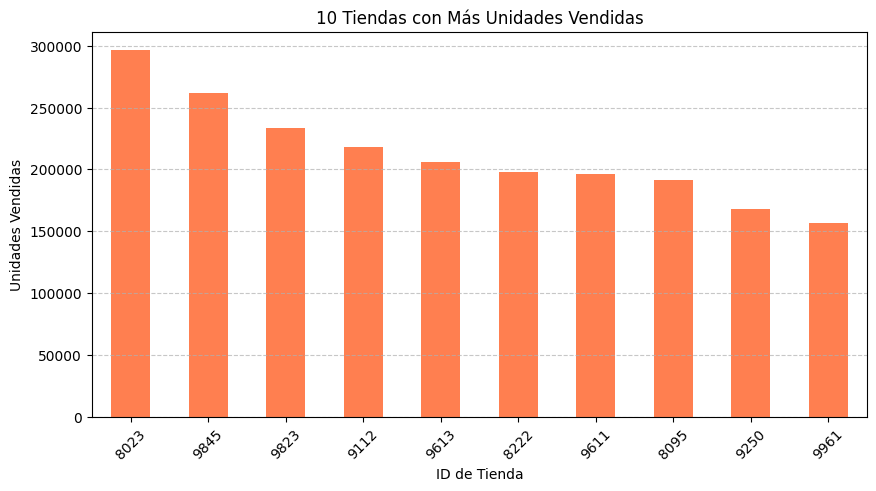

In [ ]:
# Filtrar solo las 10 tiendas con más ventas
top_n = 10
unidades_top = unidades_por_tienda.head(top_n)

# Graficar
plt.figure(figsize=(10, 5))
unidades_top.plot(kind="bar", color="coral")
plt.title(f"{top_n} Tiendas con Más Unidades Vendidas")
plt.xlabel("ID de Tienda")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Tiendas con los precios más altos

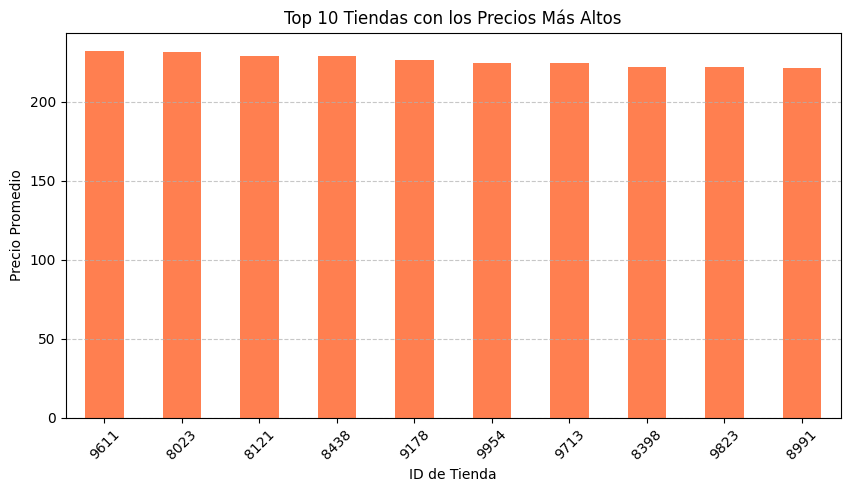

In [ ]:
# Filtrar las 10 tiendas con los precios promedio más altos
precio_mas_altos = precio_promedio.head(10)

# Graficar
plt.figure(figsize=(10, 5))
precio_mas_altos.plot(kind="bar", color="coral")
plt.title(f"Top 10 Tiendas con los Precios Más Altos")
plt.xlabel("ID de Tienda")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Peores 10 tiendas en ventas

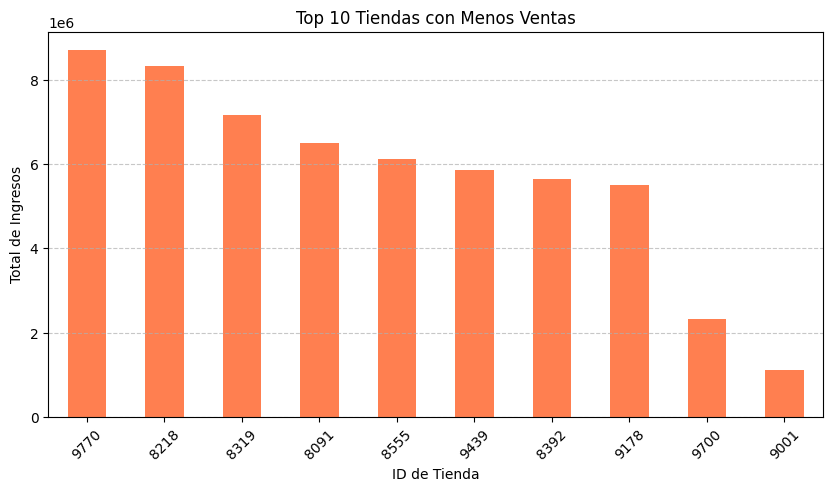

In [ ]:
# Filtrar las 10 tiendas con menos ingresos
bottom_n = 10
ventas_peores = ventas_por_tienda.tail(bottom_n)

# Graficar
plt.figure(figsize=(10, 5))
ventas_peores.plot(kind="bar", color="coral")
plt.title(f"Top {bottom_n} Tiendas con Menos Ventas")
plt.xlabel("ID de Tienda")
plt.ylabel("Total de Ingresos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Peores 10 tiendas en unidades vendidas

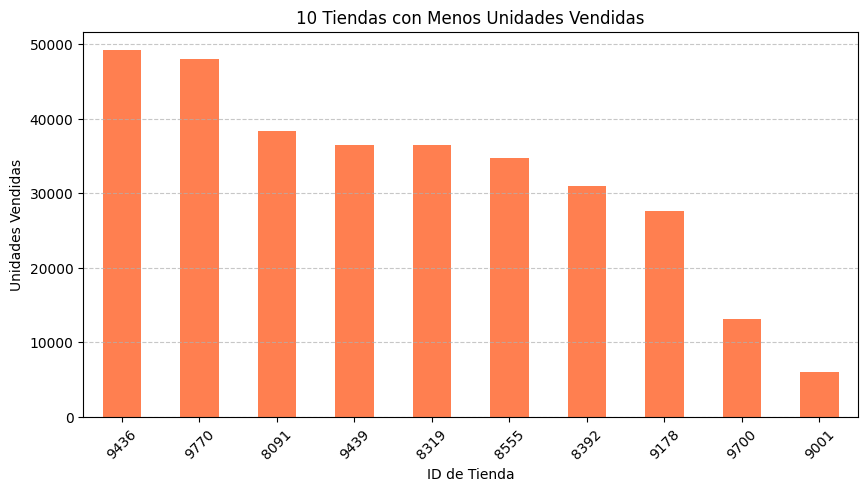

In [ ]:
# Filtrar las 10 tiendas con menos unidades vendidas
bottom_n = 10
unidades_peores = unidades_por_tienda.tail(bottom_n)

# Graficar
plt.figure(figsize=(10, 5))
unidades_peores.plot(kind="bar", color="coral")
plt.title(f"{bottom_n} Tiendas con Menos Unidades Vendidas")
plt.xlabel("ID de Tienda")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Relación entre Unidades Vendidas y Ventas Totales

In [ ]:
y = df["Units Sold"]
x = df["Total Price"]

In [ ]:
# Fit OLS model
model = sm.OLS(y, x).fit()

# Print summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             Units Sold   R-squared (uncentered):                   0.253
Model:                            OLS   Adj. R-squared (uncentered):              0.253
Method:                 Least Squares   F-statistic:                          5.074e+04
Date:                Wed, 02 Apr 2025   Prob (F-statistic):                        0.00
Time:                        23:40:51   Log-Likelihood:                     -8.4791e+05
No. Observations:              150149   AIC:                                  1.696e+06
Df Residuals:                  150148   BIC:                                  1.696e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8826.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:40:51   Log-Likelihood:            -8.2404e+05
No. Observations:              150149   AIC:                         1.648e+06
Df Residuals:                  150147   BIC:                         1.648e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.0489      0.338    237.062      

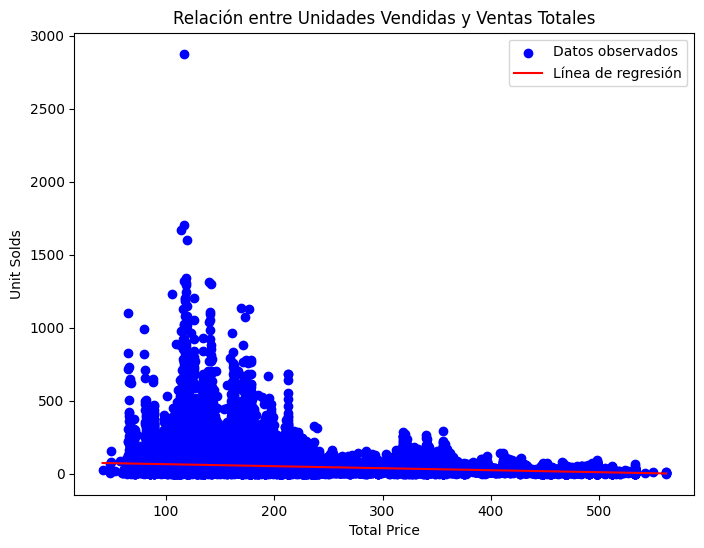

In [ ]:
# Agregar constante a X para el modelo OLS
X = sm.add_constant(x)

# Ajustar el modelo OLS
model = sm.OLS(y, X).fit()
print(model.summary())
# Realizar predicciones para la línea de regresión
x_range = np.linspace(x.min(), x.max(), 100)
X_range = sm.add_constant(x_range)
y_pred = model.predict(X_range)

# Graficar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos observados', color='blue')
plt.plot(x_range, y_pred, color='red', label='Línea de regresión')
plt.title('Relación entre Unidades Vendidas y Ventas Totales')
plt.xlabel('Total Price')
plt.ylabel('Unit Solds')
plt.legend()
plt.show()

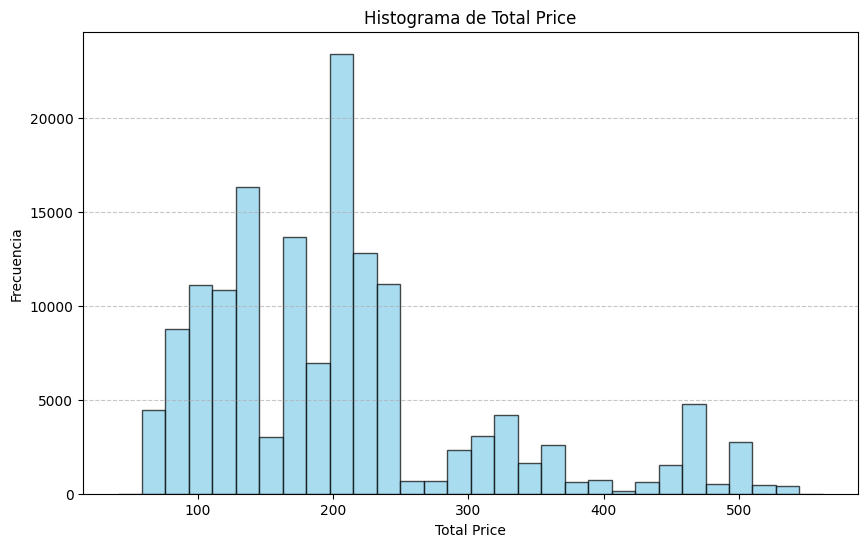

In [ ]:
#Histograma
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
plt.hist(df["Total Price"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)

#Agregar etiquetas y título
plt.xlabel("Total Price")  # Etiqueta del eje X
plt.ylabel("Frecuencia")   # Etiqueta del eje Y
plt.title("Histograma de Total Price")  # Título del gráfico
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Agregar una cuadrícula en el eje Y

#Mostrar el gráfico
plt.show()

# 4. Machine Learning

## 4.1 Regresión Lineal

In [ ]:
# 3. Seleccionar variables
X = df[["Total Price"]]  # Variable independiente
y = df["Units Sold"]  # Variable dependiente (objetivo)
print(X)

        Total Price
0           99.0375
1           99.0375
2          133.9500
3          133.9500
4          141.0750
...             ...
150145     235.8375
150146     235.8375
150147     357.6750
150148     141.7875
150149     234.4125

[150149 rows x 1 columns]


In [ ]:
# 5. Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6. Crear el modelo de regresión lineal
model = linear_model.LinearRegression()

In [ ]:
# 7. Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 8. Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)
y_pred

array([51.03142125, 51.91728299, 60.97275858, ..., 43.15709465,
       31.24717568, 64.12248922])

In [ ]:
# 9. Evaluar el modelo con métricas de error
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 3078.92
Coeficiente de Determinación (R²): 0.0591


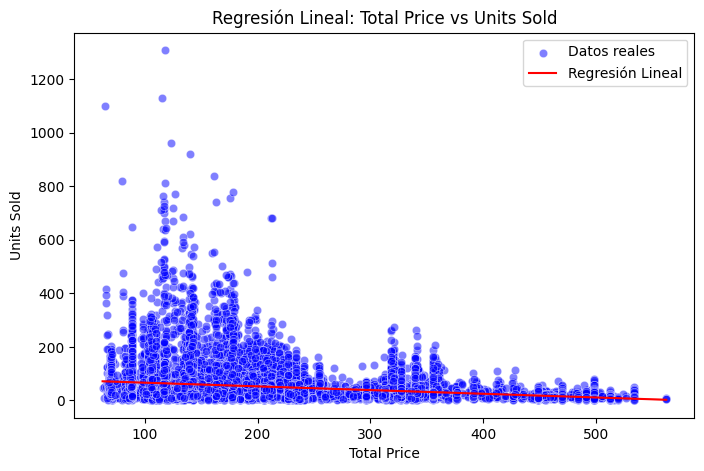

In [ ]:
# 10. Visualizar la regresión
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test["Total Price"], y=y_test, label="Datos reales", color="blue", alpha=0.5)
sns.lineplot(x=X_test["Total Price"], y=y_pred, label="Regresión Lineal", color="red")
plt.xlabel("Total Price")
plt.ylabel("Units Sold")
plt.title("Regresión Lineal: Total Price vs Units Sold")
plt.legend()
plt.show()

## 4.2 Árbol de Decisión

In [ ]:
# 4. Seleccionar variables
X = df[["Total Price"]]  # Variable independiente
y = df["Units Sold"]  # Variable dependiente
print(X)

        Total Price
0           99.0375
1           99.0375
2          133.9500
3          133.9500
4          141.0750
...             ...
150145     235.8375
150146     235.8375
150147     357.6750
150148     141.7875
150149     234.4125

[150149 rows x 1 columns]


In [ ]:
# 5. Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6. Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # max_depth limita la complejidad del árbol

In [ ]:
# 7. Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# 8. Realizar predicciones con los datos de prueba
y_pred_tree = tree_model.predict(X_test)
y_pred_tree

array([ 41.50190282,  29.84084084, 106.19919401, ...,  25.86072685,
        45.3676815 ,  62.60116347])

In [ ]:
# 9. Evaluar el modelo con métricas de error
mse_tree = mean_squared_error(y_test, y_pred_tree)  # Error cuadrático medio
r2_tree = r2_score(y_test, y_pred_tree)  # Coeficiente de determinación R²

print(f"Error Cuadrático Medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_tree:.4f}")

Error Cuadrático Medio (MSE): 2795.52
Coeficiente de Determinación (R²): 0.1457


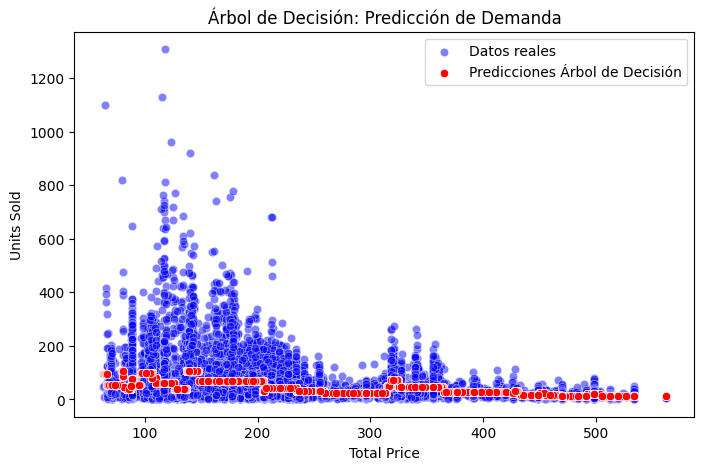

In [ ]:
# 10. Visualizar la predicción
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test["Total Price"], y=y_test, label="Datos reales", color="blue", alpha=0.5)
sns.scatterplot(x=X_test["Total Price"], y=y_pred_tree, label="Predicciones Árbol de Decisión", color="red")
plt.xlabel("Total Price")
plt.ylabel("Units Sold")
plt.title("Árbol de Decisión: Predicción de Demanda")
plt.legend()
plt.show()